In [108]:
# First attempt to fuse SST and land image datasets
# Coarse registration via snap, finer registration (maybe) required post upscaling
# One problem: pixel mask for landmass in SST image not perfectly overlapped with
# image data.
# data from 09/03/2017. Image band 8 (840 nm) level 1C. SST L4 product from CMEMS.
import os
this_path = os.getcwd()

In [109]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(this_path) if isfile(join(this_path, f))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Ground Image')

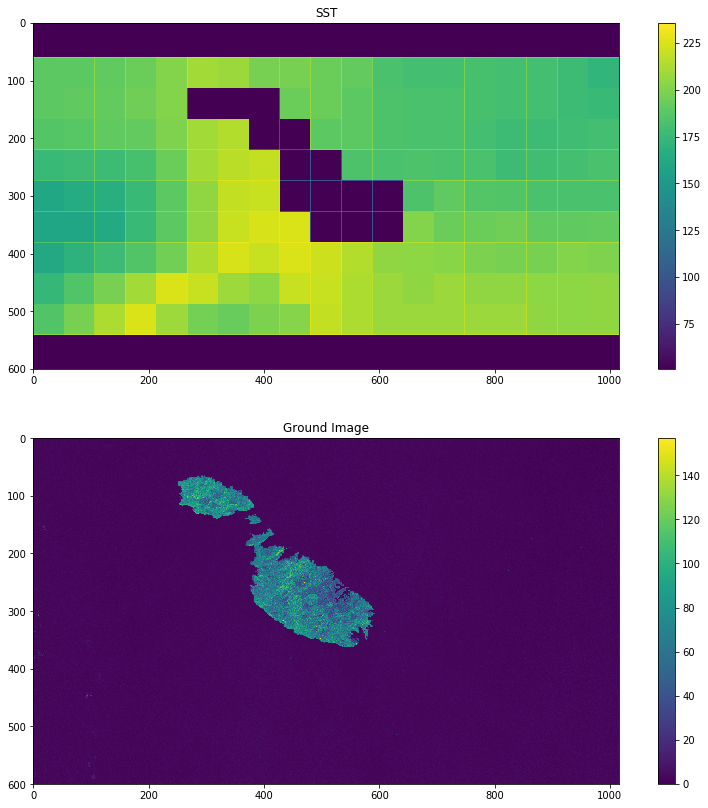

In [114]:
# import and compare image with SST
from scipy import ndimage, misc
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

image1 = misc.imread(onlyfiles[1],flatten=1) #upscaled SST
image2 = misc.imread(onlyfiles[2],flatten=1) # Image file

# plot individually and compare
plt.rcParams['figure.figsize'] = [14, 14]

plt.subplot(2,1,1)
plt.imshow(image1)
plt.colorbar()
plt.title('SST')

plt.subplot(2,1,2)
plt.imshow(image2)
plt.colorbar()
plt.title('Ground Image')


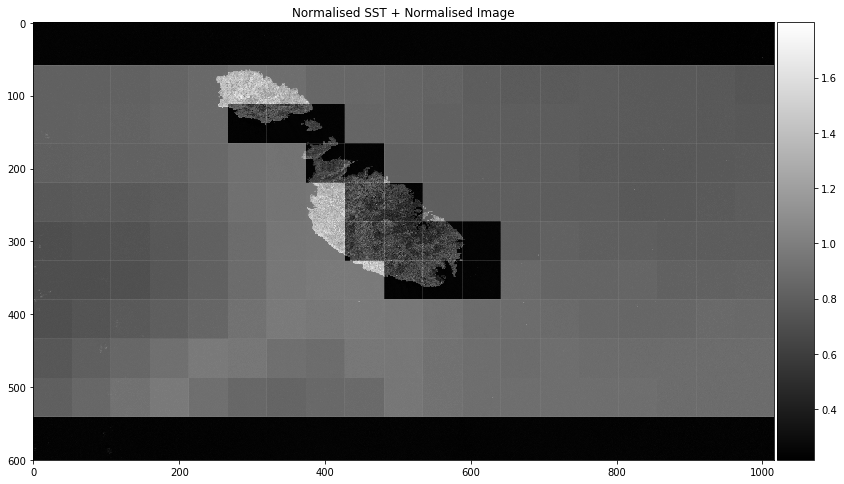

In [44]:
# plot sum of normalised data from the two sources
# as a visual check of registration between two datasets
plt.rcParams['figure.figsize'] = [14, 14]
ax = plt.subplot(111)
fused_data = image1/amax(image1)+image2/amax(image2)
im = ax.imshow(fused_data,cmap='gray')

plt.title('Normalised SST + Normalised Image')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

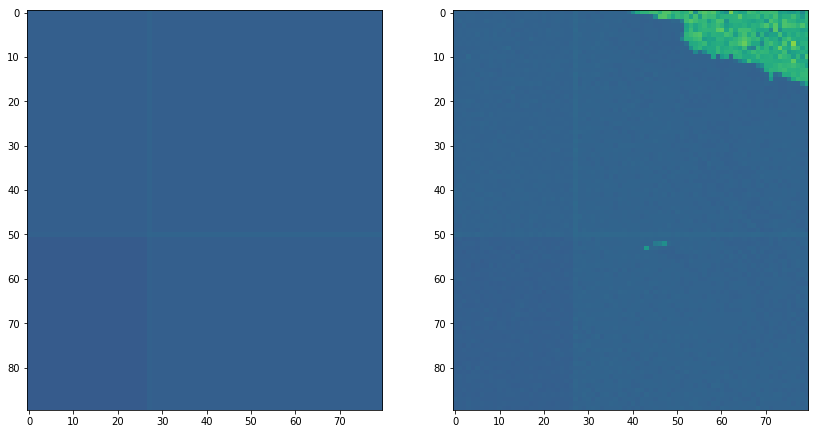

In [106]:
# Compare shore regions
# to do
# array indexing (fewer hard coded numbers)
ind_y = list(range(330,380));
ind_x = list(range(440,480));
 
plt.subplot(1,2,2)
plt.imshow(fused_data[330:420,400:480])
#plt.colorbar()
plt.clim(0.5,2) # plot on same colour scale

n_image1 = image1/amax(image1)
plt.subplot(1,2,1)
plt.imshow(n_image1[330:420,400:480])
#plt.colorbar()
plt.clim(0.5,2)


In [113]:
print(onlyfiles[2])

subset_5_of_subset_3_of_T33SVV_20170309T095021_B08_band_1.bmp
